<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
# !wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [27]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Demo: How to run an sql query


In [29]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [8]:
# your code goes here
QUERY = """
SELECT ConvertedComp as ConvertedComp
FROM master
"""
pd.read_sql_query(QUERY,conn)

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0
...,...
11393,130000.0
11394,19880.0
11395,105000.0
11396,80371.0


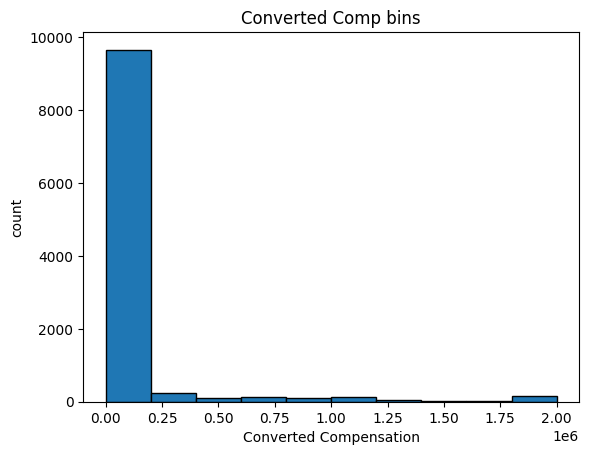

In [12]:
plt.hist(pd.read_sql_query(QUERY,conn) , edgecolor= 'black')

# set x/y labels and plot title
plt.xlabel("Converted Compensation")
plt.ylabel("count")
plt.title("Converted Comp bins")
plt.show()

### Box Plots


Plot a box plot of `Age.`


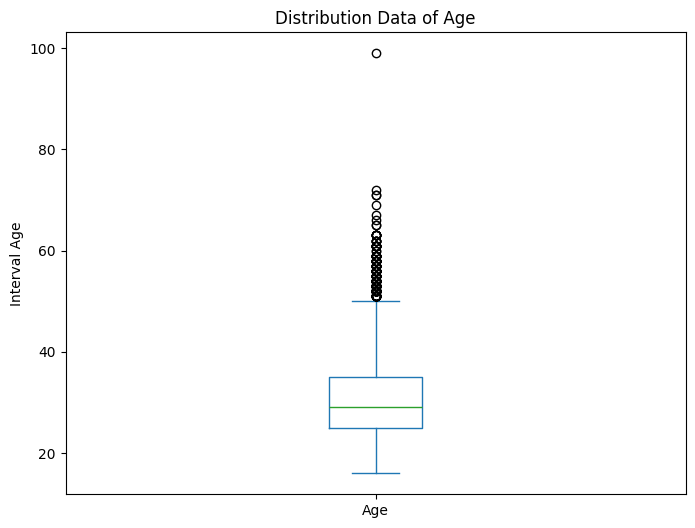

In [13]:
# your code goes here
QUERY = """
SELECT Age as Age
FROM master
"""

pd.read_sql_query(QUERY,conn).plot(kind='box', figsize=(8, 6))

plt.title('Distribution Data of Age')
plt.ylabel('Interval Age')

plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [14]:
# your code goes here
QUERY = """
SELECT Age as Age , WorkWeekHrs as WorkWeekHrs
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df.head()

,Age,WorkWeekHrs
0,22.0,80.0
1,23.0,32.0
2,28.0,40.0
3,26.0,40.0
4,29.0,45.0


Text(0.5, 1.0, 'Scatter Plot of Age vs WorkWeekHrs')

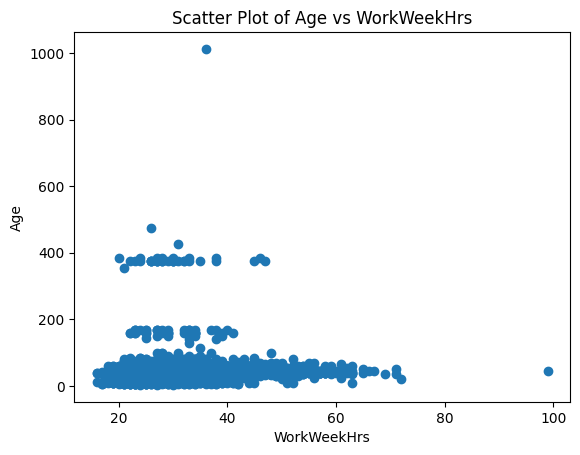

In [16]:
y = df['WorkWeekHrs']
x = df['Age']
plt.scatter(x, y)
plt.xlabel("WorkWeekHrs")
plt.ylabel("Age")
plt.title("Scatter Plot of Age vs WorkWeekHrs")

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [17]:
QUERY = """
SELECT CodeRevHrs as CodeRevHrs
FROM master
"""

In [18]:
df['CodeRevHrs'] = pd.read_sql_query(QUERY,conn)

In [19]:
df.head()

,Age,WorkWeekHrs,CodeRevHrs
0,22.0,80.0,NaN
1,23.0,32.0,12.0
2,28.0,40.0,5.0
3,26.0,40.0,NaN
4,29.0,45.0,5.0


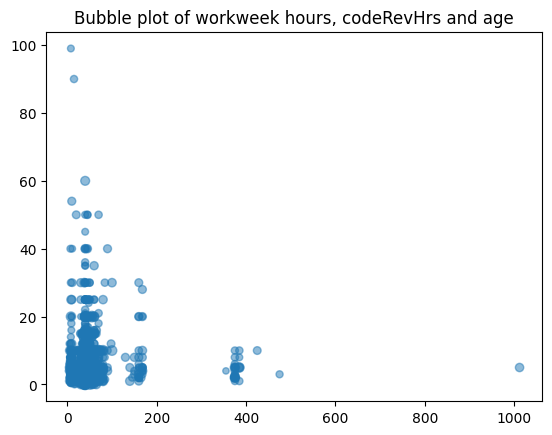

In [20]:
# your code goes here
plt.scatter(df['WorkWeekHrs'],df['CodeRevHrs'],s=df['Age'],alpha=0.5)
plt.title('Bubble plot of workweek hours, codeRevHrs and age')
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


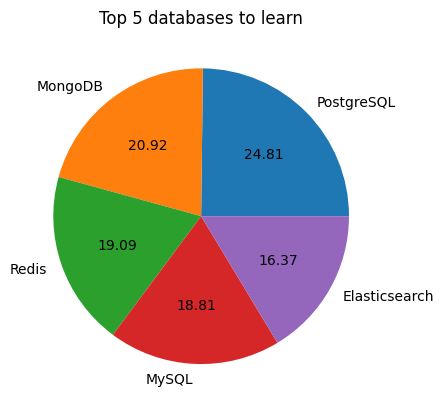

In [21]:
# your code goes here

QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df_db = pd.read_sql_query(QUERY,conn)
df_count=df_db['DatabaseDesireNextYear'].value_counts().rename_axis('DatabaseName').reset_index(name='Counts')
df_top5=df_count[:5].copy()

plt.pie(df_top5['Counts'],labels=df_top5['DatabaseName'],autopct='%.2f')
plt.title('Top 5 databases to learn')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


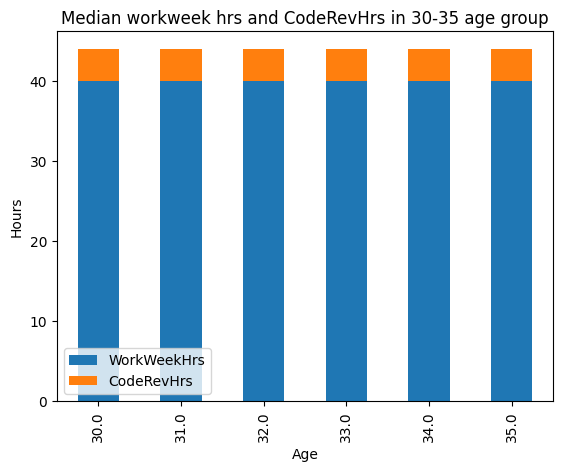

In [22]:
# your code goes here

QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
"""
df_wk = pd.read_sql_query(QUERY,conn)

df_g=df_wk.groupby('Age').median()

df_g.plot(kind='bar',stacked=True)
plt.title('Median workweek hrs and CodeRevHrs in 30-35 age group')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


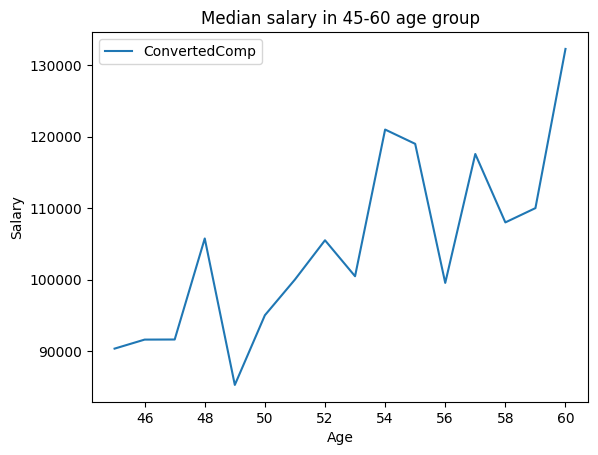

In [23]:
# your code goes here

QUERY = """
SELECT Age,ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""
df_ac = pd.read_sql_query(QUERY,conn)

df_gr=df_ac.groupby('Age').median()

df_gr.plot(kind='line')
plt.title('Median salary in 45-60 age group')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


MainBranch
I am a developer by profession                                                   10618
I am not primarily a developer, but I write code sometimes as part of my work      780
Name: count, dtype: int64


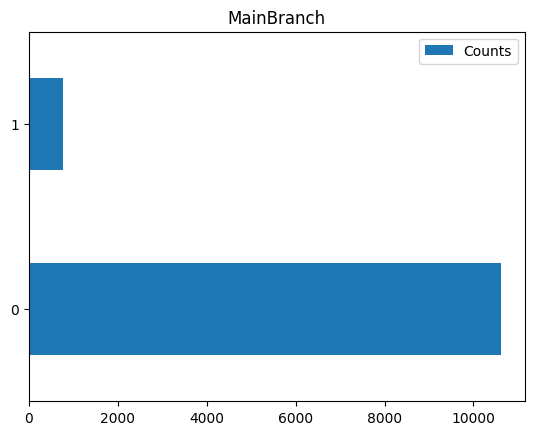

In [30]:
# your code goes here
QUERY = """
SELECT MainBranch
FROM master
"""
df_mb = pd.read_sql_query(QUERY,conn)
df_cnt=df_mb['MainBranch'].value_counts().rename_axis('MainBranch').reset_index(name='Counts')
print(df_mb['MainBranch'].value_counts())
df_cnt.plot(kind='barh')
plt.title('MainBranch')
plt.show()


Close the database connection.


In [25]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
